# Шифрование данных и работа ML моделей 

### Вводная <a class="tocSkip">
    
Наша компания озаботилась защитой данных при использовании моделей машинного обучения. Необходимо предложить такой метод защиты данных, чтобы по ним было сложно восстановить изначалные данные. Также необходимо рассомтреть то, как шифрование влияет на результат работы модели линейной регрессии, которая используется в компании.
    
Для проверки алгоритма предоставлены данные клиентов страховой компании «С» (пол, возраст и зарплата, количество членов семьи, количество страховых выплат). 

### Цель<a class="tocSkip">
 Предложить такой алгоритм защититы данных, при котором конечное качество моделей машинного обучения не ухудшится.

### Описание данных <a class="tocSkip">

- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

### План <a class="tocSkip">

    1. Загрузка и изучение данных.
    2. Ответ на вопрос: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 
         Разбор того, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
    3. Алгоритм преобразования данных.
    4. Применение алгоритма. Проверка метрикой R2, что качество линейной регрессии не отличается до и после преобразования.

## 0. Установка библиотек <a class="tocSkip">

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

#фильтр предупреждений
import warnings
warnings.simplefilter("ignore")

In [1]:
#ramdom seed
RS = 2021

## Загрузка данных

In [3]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Text(0.5, 1.0, 'Распределение целевого признака')

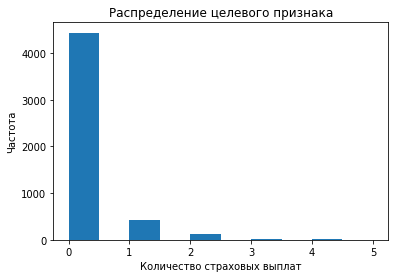

In [5]:
data.iloc[:, 4].plot(kind = 'hist')

plt.xlabel('Количество страховых выплат')
plt.ylabel('Частота')
plt.title('Распределение целевого признака')

Распределение целевого признака показывает что в основном клиенты не получают страховые выплаты (значение 0).  
Максимальное количество выплат - 5.  
Распределение похоже на распределение Пуассона.

In [6]:
data.isna().sum().sum()

0

Пропусков в данных нет.

In [7]:
data.duplicated().sum()

153

Наблюдаем 153 дубликата. Поскольку наша задача это создание аглоритма шифрования, а не обучение наилучшей модели, оставим их.

### Вывод:

- Получены данные о 5000 клиентах. 
- Распределение целевого признака показывает что в основном клиенты не получают страховые выплаты (значение 0). Максимальное количество выплат - 5. Распределение похоже на распределение Пуассона.

- Пропусков в данных нет.

- Наблюдаем 153 дубликата. Их было решено оставить.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $K$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$
или 
$$
X^T X w = X^T y
$$

Вопрос:
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
    a. Изменится. Приведите примеры матриц.  
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** b

**Обоснование:** 

Рассмотрим что происходит с предсказаниями при переходе \\(  X -> XK \\):

Уже обученная модель будет делать предсказания по следующей формуле:
$$ a_1 = XKw_1 $$

Формула обучения будет выглядеть как:

$$
(XK)^T XK w_1 = (XK)^T y
$$

Воспользуемся свойством \\((AB)^T=B^TA^T\\):

$$
K^T X^T X K w_1 = K^T X^T y
$$

Домножим обе части уравнения на \\( (K^T)^{-1} \\):

$$
X^T X K w_1 = X^T y
$$

$$
K w_1 = (X^T X)^{-1} X^T y
$$

$$
K w_1 = w
$$

Таким образом \\( a_1 = a\\).

## Алгоритм преобразования

**Алгоритм**

1. Генерирация случайной матрицы, которая будет умножаться на матрицу признаков.
2. Проверка сгенерированной матрицы на обратимость. 
3. Умножение матрицы-кодировщика на признаки.
4. Проверка того, что результат не изменился.

**Обоснование**

Какой будет размерность случайной матрицы и почему? Для того, чтобы мы могли умножить матрицу-кодировщик на признаки, количество её строк должно быть равно количеству столбцов в признаках. 

Почему матрица-кодировщик должна быть обратимой? Обратимой она должна быть чтобы мы могли вычислить значение \\((X^T X)^{-1}\\) при Х = ХK, а также выполнять с ней вышеперечисленные преобразования.

## Проверка алгоритма

Сначала запустим модель без преобразований. Выделим целевой признак и разделим выборки на обучающую и валидационную.

In [8]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=RS)

In [9]:
#проверим разделение
print(features_train.shape)
print(target_train.shape)

print(features_valid.shape)
print(target_valid.shape)

(3750, 4)
(3750,)
(1250, 4)
(1250,)


In [10]:
model = LinearRegression()

model.fit(features_train, target_train)
predictions = model.predict(features_valid)

mse = mean_squared_error(target_valid, predictions)
r2 = r2_score(target_valid, predictions)

print('MSE: {:.6f}'.format(mse))
print('R2 score: {:.6f}'.format(r2))

MSE: 0.145304
R2 score: 0.416359


Зададим нашу матрицу-ключ K. Она должна умножаться на матрицу признаков и быть обратимой.

In [11]:
np.random.seed(RS)
K = np.random.randint(10, size = (len(features.columns), len(features.columns)))

K_inv = np.linalg.inv(K)
K

array([[4, 5, 9, 0],
       [6, 5, 8, 6],
       [6, 6, 6, 1],
       [5, 7, 1, 1]])

Умножим признаки на матрицу К

In [12]:
features_train_encoded = features_train.values @ K
features_valid_encoded = features_valid.values @ K

features_train_encoded

array([[153264., 153220., 153352.,  25764.],
       [271341., 271322., 271386.,  45333.],
       [195299., 195252., 195393.,  32795.],
       ...,
       [271973., 271947., 272025.,  45469.],
       [197692., 197649., 197778.,  33184.],
       [161608., 161575., 161681.,  27104.]])

In [13]:
features_train_encoded.shape

(3750, 4)

In [14]:
model = LinearRegression()

model.fit(features_train_encoded, target_train)
predictions = model.predict(features_valid_encoded)

mse = mean_squared_error(target_valid, predictions)
r2 = r2_score(target_valid, predictions)

print('MSE: {:.6f}'.format(mse))
print('R2 score: {:.6f}'.format(r2))

MSE: 0.145304
R2 score: 0.416359


## Вывод

**1.** На первом этапе мы загрузили и изученили данные.
- Для анализа были получены данные о 5000 клиентах. 
- Распределение целевого признака показывает что в основном клиенты не получают страховые выплаты (значение 0). Максимальное количество выплат - 5. Распределение похоже на распределение Пуассона.

- Пропусков в данных не было.

- Было найдено 153 дубликата. Их было решено оставить.

**2.** Был дан ответ на вопрос: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 
     b. Не изменится. Мы в общем виде доказали что предсказания модели не поменяются. А также предоставили разбор того, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
        
**3.** Описали алгоритм преобразования данных и обосновали его.

**4.** На последнем шаге мы применили предложенный алгоритм.  
Сначала мы запустили модель без преобразований и посчитали R2. 
С помощью `np.random` задали нашу матрицу-кодировщик K с правильной размерностью и обратной матрицей. 
Умножили признаки на матрицу К.
R2 score до и после преобразований не изменился и составлял: 0.416359.